# Final Project 2 Reproducible Report on COVID19 Data

Import, tidy and analyze the COVID19 dataset from the Johns Hopkins github site. This is the same dataset I used in class. Feel free to repeat and reuse what I did if you want to. Be sure your project is reproducible and contains some visualization and analysis that is unique to your project. You may use the data to do any analysis that is of interest to you. You should include at least two visualizations and one model.  Be sure to identify any bias possible in the data and in your analysis.

### Outline:

* 1. You can run this notebook in the Jupyter notebook R environment to reproduce the same result.

* 2 . Objective, what are the questions ?
    * Find out what trend in US covid cases is like?
    * Cases difference in different provinces in Canada?


* 3. Data source : https://github.com/CSSEGISandData/COVID-19/
This data contains global data for COVID-19 cases operated by the Johns Hopkins University Center for Systems Science and Engineering. 

* 4. There are 2 visualizations plotted in the following section.

* 6. The model for data used is time series model, using data from the previous 60 days number of deaths to predict the next 2 week's number. We can see form the plot, in next 2 weeks cases in the US is still increasing. 

* 7. Additional analysis: For time series modeling, we should be careful using yearly.seasonality and daily.seasonality, before we apply these seasonality we can use plot to observe if any seasonality occur, or us moving average to test.

* 8. Bias analysis section is provided.


In [2]:
library(tidyverse)
library(lubridate)
set.seed(2022)
Sys.setenv(LANG = "en")

-- Attaching packages ------------------------------------------------------------------------------ tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.0     v forcats 0.5.1

-- Conflicts --------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




### 1 Load data from urls

2 data set, global cases, global_deaths aare loaded.

In [3]:
url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/'
file_names = c('time_series_covid19_confirmed_global.csv',
            'time_series_covid19_deaths_global.csv',
            'time_series_covid19_confirmed_US.csv',
             'time_series_covid19_deaths_US.csv')
urls = str_c(url, file_names)

global_cases = read_csv(urls[1])
global_deaths = read_csv(urls[2])
#us_cases = read_csv(urls[3])
#us_cases = read_csv(urls[4])

Rows: 285 Columns: 863

-- Column specification -----------------------------------------------------------------------------------------------
Delimiter: ","
chr   (2): Province/State, Country/Region
dbl (861): Lat, Long, 1/22/20, 1/23/20, 1/24/20, 1/25/20, 1/26/20, 1/27/20, ...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 285 Columns: 863

-- Column specification -----------------------------------------------------------------------------------------------
Delimiter: ","
chr   (2): Province/State, Country/Region
dbl (861): Lat, Long, 1/22/20, 1/23/20, 1/24/20, 1/25/20, 1/26/20, 1/27/20, ...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



### 2 Tidying and Transforming Data

Drop columns, and select US , Canada data.

In [4]:
global_cases = global_cases %>%
    pivot_longer(cols = -c('Province/State','Country/Region',
                           Lat,Long),
    names_to = 'date',
    values_to = 'cases') %>%
    select(-c(Lat, Long))

global_deaths = global_deaths  %>%
    pivot_longer(cols = -c('Province/State','Country/Region',
                           Lat,Long),
    names_to = 'date',
    values_to = 'deaths') %>%
    select(-c(Lat, Long))

In [5]:
global = global_cases %>% 
    full_join(global_deaths) %>%
    rename(Country_Region = 'Country/Region',
            Province_State = 'Province/State') %>%
    mutate(date = mdy(date))

Joining, by = c("Province/State", "Country/Region", "date")



In [6]:
global = global %>% filter(cases > 0)
us_cases = global %>% filter(Country_Region =='US')
ca_cases = global %>% filter(Country_Region =='Canada')

In [7]:
summary(global)
#global %>% filter(cases > 28000000)

 Province_State     Country_Region          date                cases         
 Length:225241      Length:225241      Min.   :2020-01-22   Min.   :       1  
 Class :character   Class :character   1st Qu.:2020-09-28   1st Qu.:     712  
 Mode  :character   Mode  :character   Median :2021-04-22   Median :   10769  
                                       Mean   :2021-04-19   Mean   :  626939  
                                       3rd Qu.:2021-11-10   3rd Qu.:  156422  
                                       Max.   :2022-05-29   Max.   :83984644  
     deaths       
 Min.   :      0  
 1st Qu.:      6  
 Median :    130  
 Mean   :  11241  
 3rd Qu.:   2463  
 Max.   :1004733  

## 3 Visualization and analysis

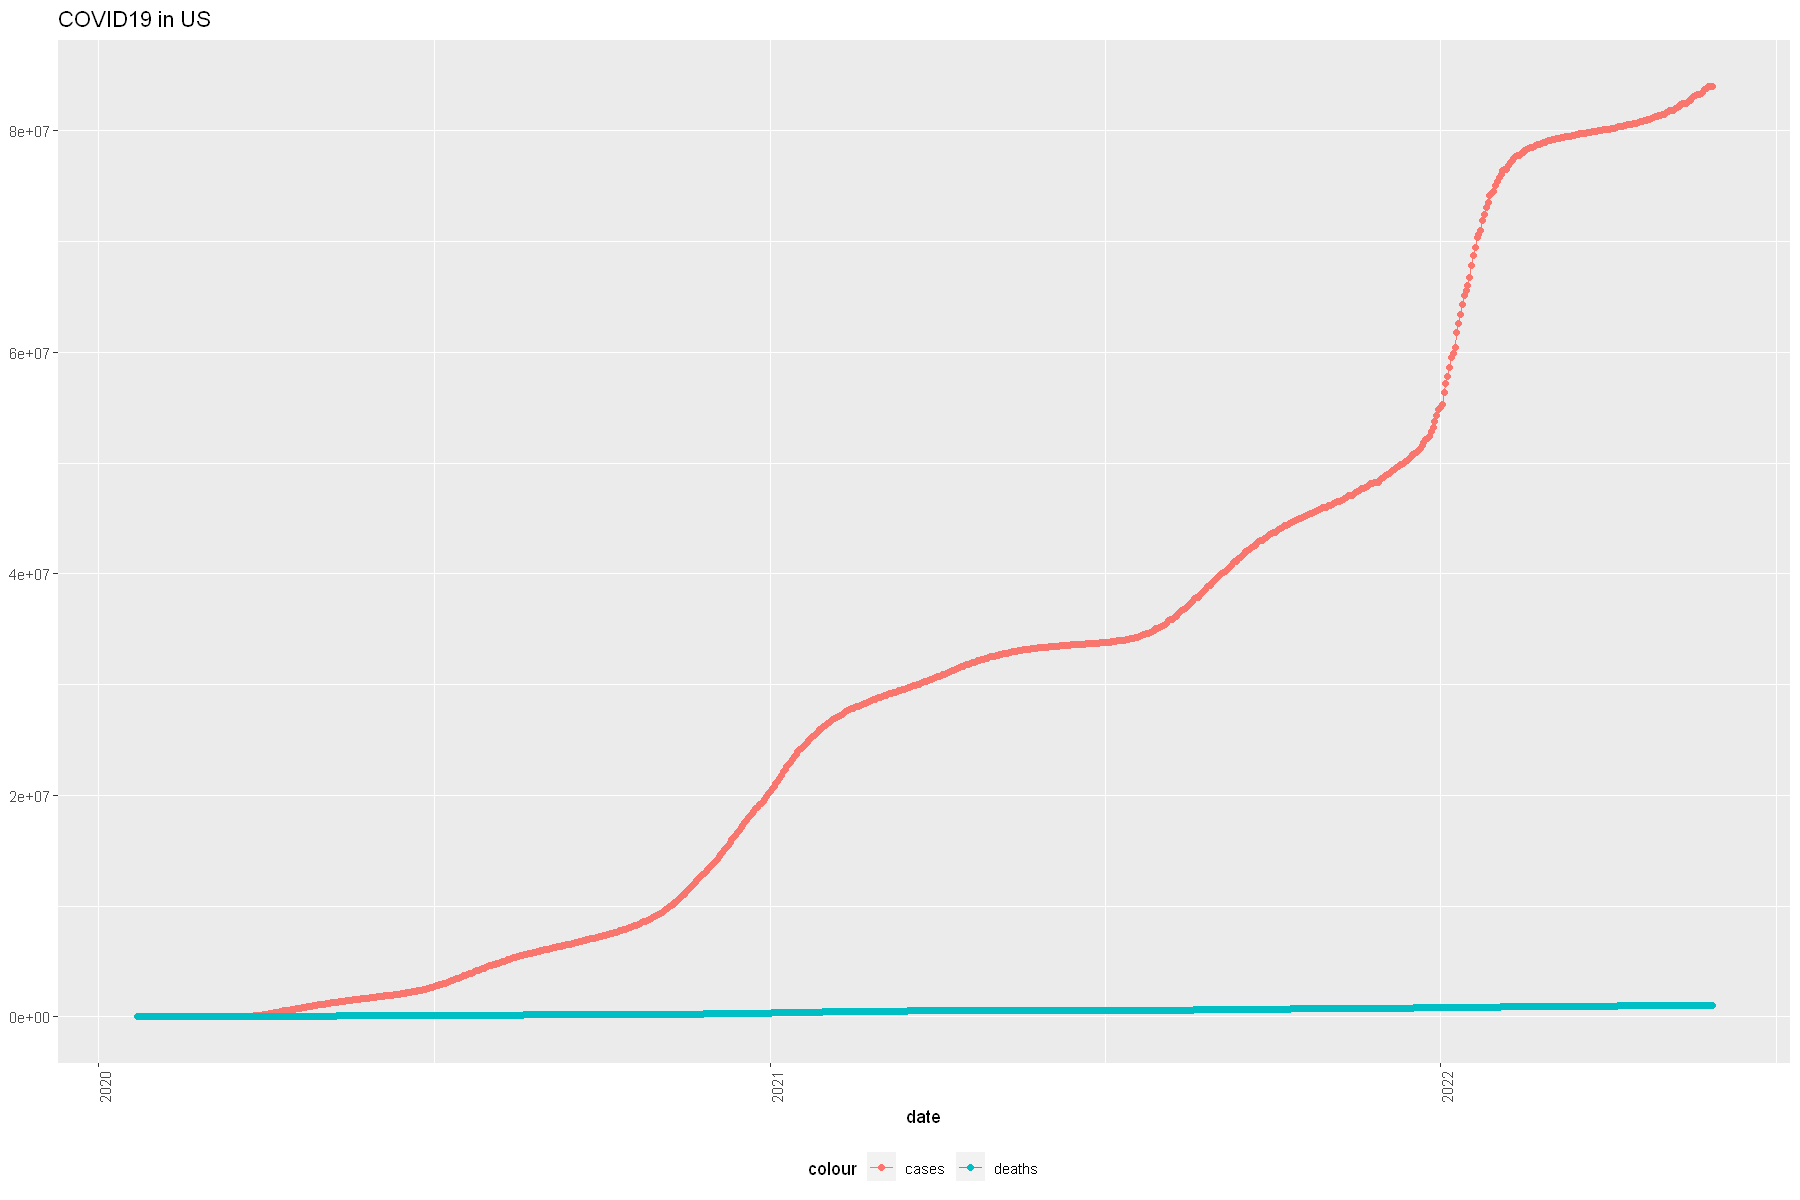

In [14]:
options(repr.plot.width=15, repr.plot.height=10)
ggplot(us_cases, aes(x=date, y=cases)) + 
    geom_line(aes(color = 'cases')) + 
    geom_point(aes(color = 'cases')) + 
    geom_line(aes(y = deaths, color = 'deaths')) + 
    geom_point(aes(y = deaths, color = 'deaths'))  + 
    #scale_y_log10() + 
    theme(legend.position='bottom', 
             axis.text.x = element_text(angle=90)) +
    labs(title='COVID19 in US', y=NULL)

Cases in the US increase most significantly during 2020-9 to 2021-1, and 2022-01 to 2022-03. 

In [12]:
#extract different province in Canada

ca_cases$Province_State = as.factor(ca_cases$Province_State)

In [111]:
head(ca_cases)

Province_State,Country_Region,date,cases,deaths
<fct>,<chr>,<date>,<dbl>,<dbl>
Alberta,Canada,2020-03-06,1,0
Alberta,Canada,2020-03-07,2,0
Alberta,Canada,2020-03-08,4,0
Alberta,Canada,2020-03-09,7,0
Alberta,Canada,2020-03-10,7,0
Alberta,Canada,2020-03-11,19,0


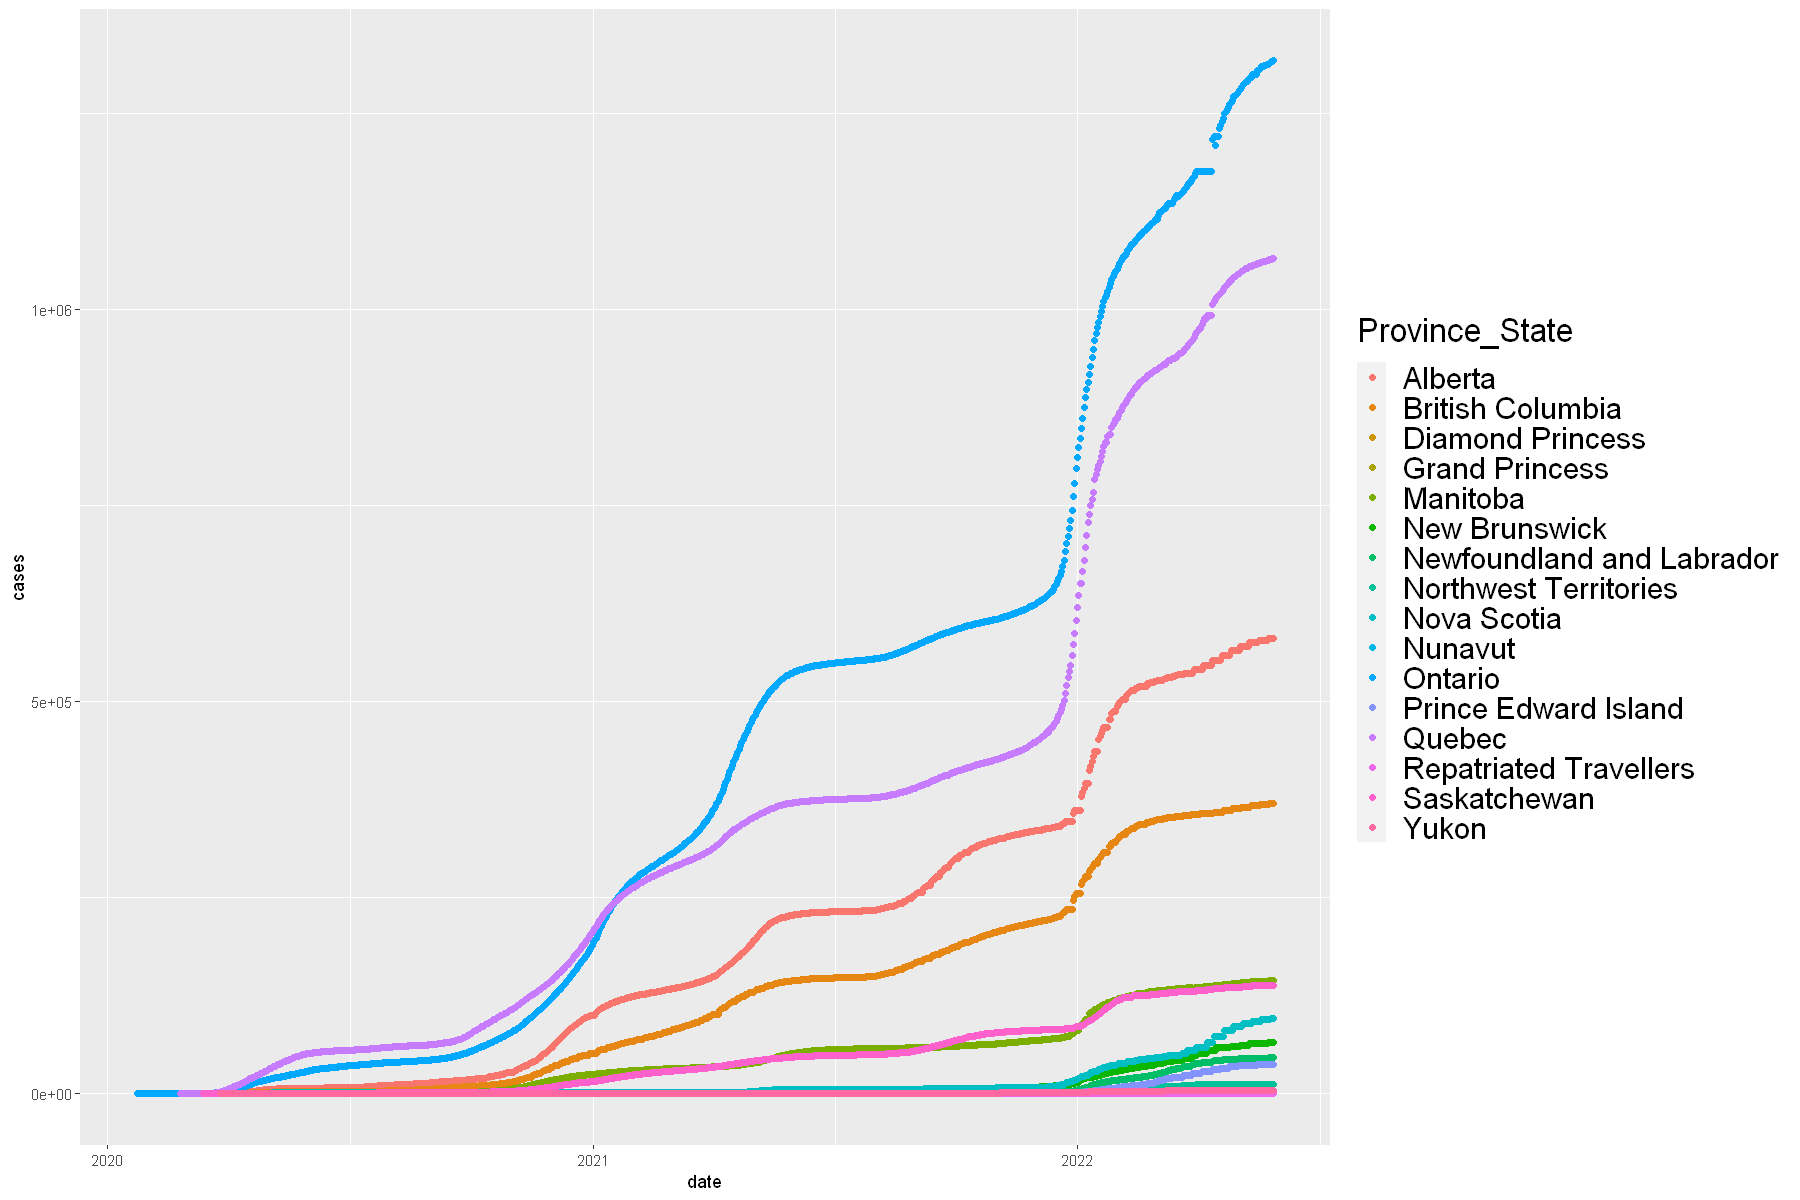

In [13]:
options(repr.plot.width=15, repr.plot.height=10)
ggplot(data = ca_cases) +
    geom_point(mapping = 
            aes(x = date, y = cases, 
                color = Province_State)) + 
    theme(legend.text=element_text(size=18), 
         legend.title=element_text(size=20),
         plot.title = element_text(size = 12, face = "bold"))

In Canada, Quebec and Ontario are two province with the most cases. And in terms of increasing rate, at the beginning of 2022, due to the Omicron variant, the cases reported increase the most, close to a vertical line.  

## 4 Simple modeling


In [35]:
library(prophet)
us_death_ts = us_cases[ , c('date', 'deaths')]
colnames(us_death_ts) <- c("ds","y")

#only use last 100/60  days
us_death_ts = tail(us_death_ts, n = 100)


ts = prophet(us_death_ts, yearly.seasonality = FALSE, daily.seasonality = TRUE)
future = make_future_dataframe(ts, periods = 30)
forecast = predict(ts, future)


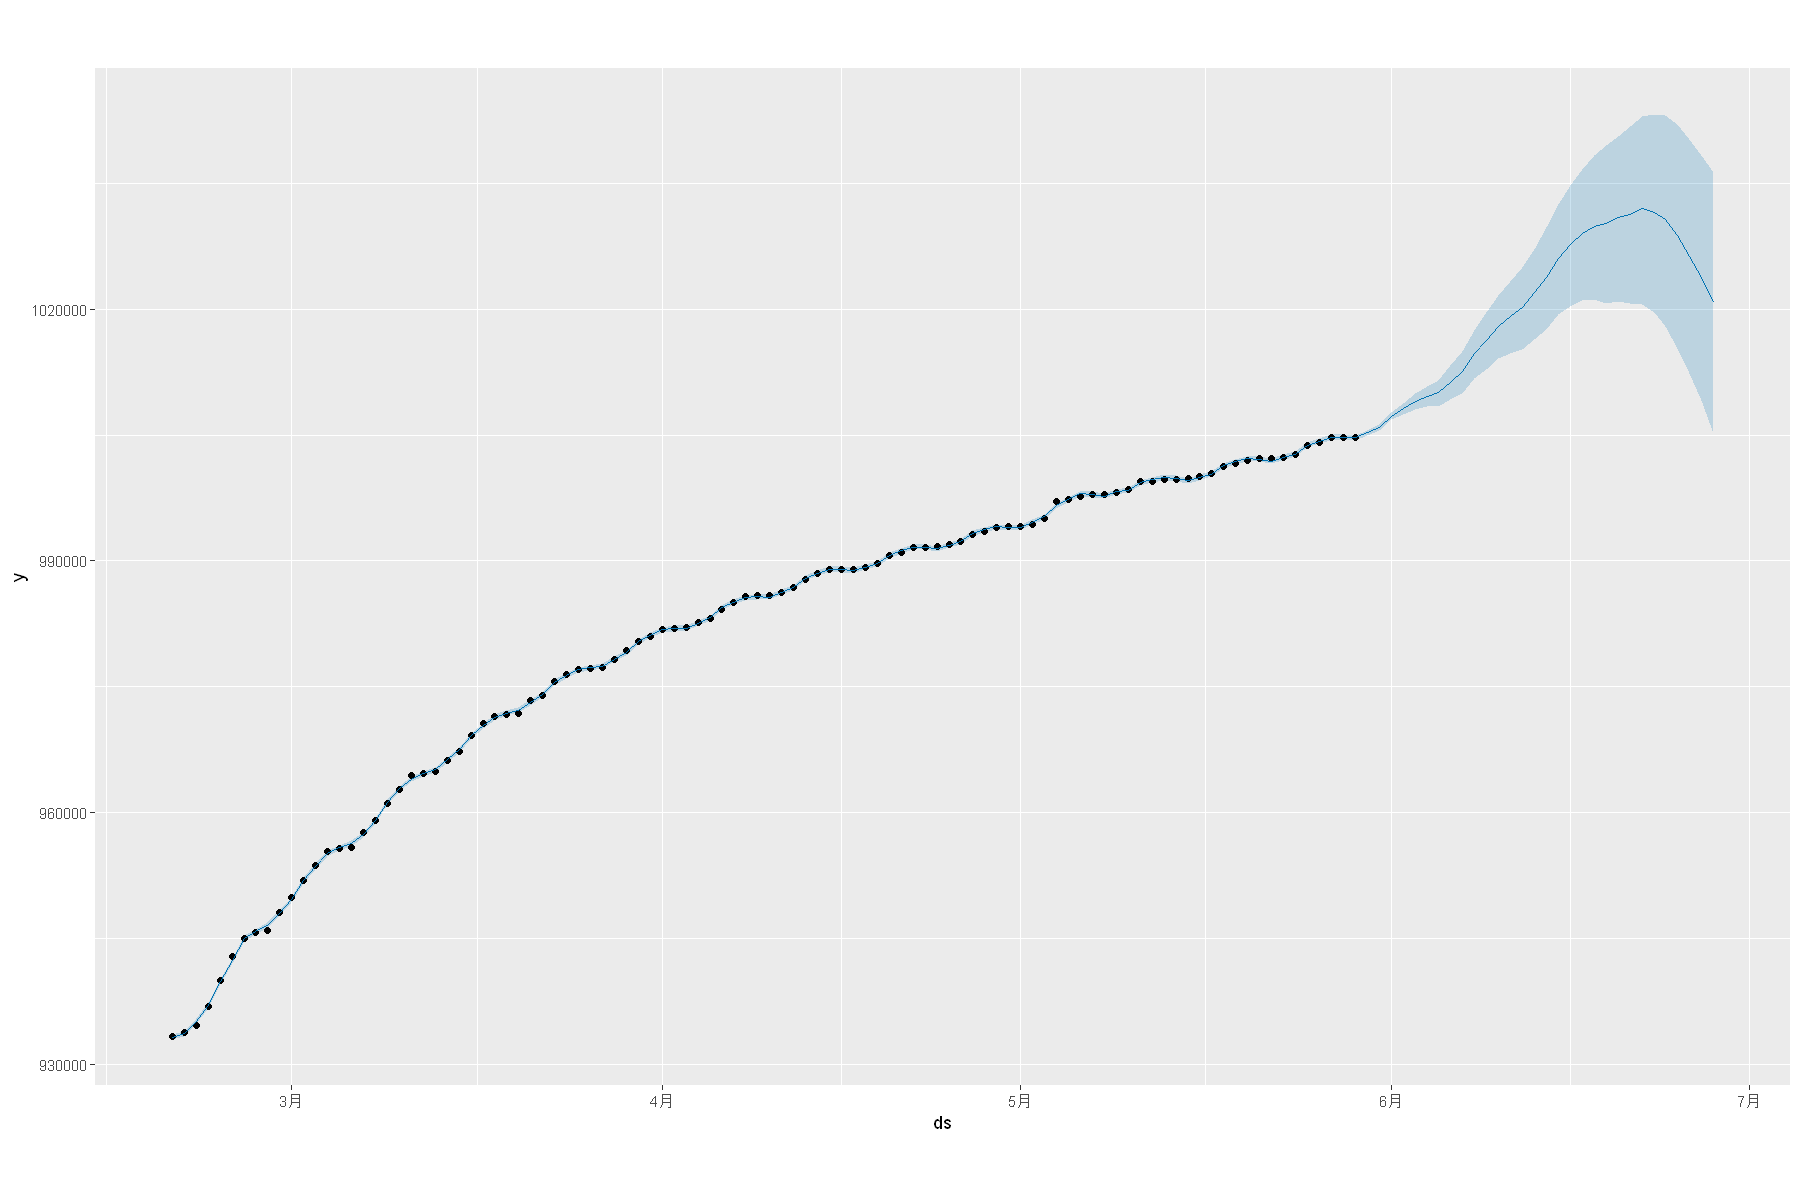

In [34]:
plot(ts, forecast)


Analysis: 

In the modeling above, we choose the “prophet” package to forecast a time series. Because our data show some seasonly effect, during Fall and winter cases are increase more rapidly.

As the package state: 'prophet: Automatic Forecasting Procedure
Implements a procedure for forecasting time series data based on an additive model where non-linear trends fit with yearly, weekly, and daily seasonality.'

Building a time series model, use the last 100 day's number of deaths to predict not 3 week's number. We can see from the plot, in the next 4 weeks cases in the US are still increasing. But in later weeks in June, it captures some seasonal trend and forecasts the cases will drop significantly.  


## 5 Identify any bias and Conclusion

##### A possible bias: 

Most testing agencies or data processing staff will have a day off in Canada(at least in Alberta) on the weekends, so we can observe a pattern in data, cases drop dramatically during weekends. It's not because less positive cases among all people being tested.


##### Conclusion:

Answer the question in the beginning:

* Find out what the trend in the US in 2022 's covid cases is like?

  Cases in the US increase most significantly during 2020-9 to 2021-1, and 2022-01 to 2022-03.



* Cases difference in different provinces in Canada?

  In Canada, Quebec and Ontario are two province with the most cases. And in terms of increasing rate, at the beginning of 2022, due to the Omicron variant, almost all province reported cases increased dramatically.
 

